In [26]:
#importing libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt 
import seaborn as sns

Importing libraries for the whole assessment as they allow us to be able to plot graphs,perform mathematical calculations e.t.c

In [27]:
#setting the columns and row views to full
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 

Making the data columns and rows fully visible

In [28]:
start = time.time()
startptd = time.strftime('%X %x %Z')
print('\n','The program start time and Date','\n',startptd)


 The program start time and Date 
 19:16:21 10/03/18 South Africa Standard Time


Defining function for ouputting current date and time for our system

In [29]:
#setting up the working directory
os.chdir('D:\Machine_learning\Assessments-master (1)\Assessments-master\Data Science Assessment\\')

Initialising working space of our project

In [30]:
print('Importing the Dataset, please wait...','\n')
#reading the dataset
dfA = pd.read_csv("assessment_data.csv", sep=',', encoding='utf-8')
print('Dataset loaded successfuly...','\n')

Importing the Dataset, please wait... 

Dataset loaded successfuly... 



In [31]:
#getting the summary stats of the dataset
dfA.describe().T

,count,mean,std,min,25%,50%,75%,max
target_var,1309.0,0.381971,0.486055,0.000000,0.000000,0.000000,1.000000,1.00000
feature_1,1308.0,33.295479,51.758668,0.000000,7.895800,14.454200,31.275000,512.32920
feature_2,1309.0,0.385027,0.865560,0.000000,0.000000,0.000000,0.000000,9.00000
feature_3,1309.0,0.498854,1.041658,0.000000,0.000000,0.000000,1.000000,8.00000
feature_6,1046.0,29.881135,14.413500,0.166700,21.000000,28.000000,39.000000,80.00000
feature_7,1309.0,2.294882,0.837836,1.000000,2.000000,3.000000,3.000000,3.00000
feature_9,1309.0,101.794120,50.890853,-93.974333,68.550768,102.039185,135.175053,264.69229


Getting summary statistics of our data

In [32]:
#the shape of the data
print(dfA.shape) 

(1309, 10)


In [33]:
#head view
dfA.head(10)

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,211.3375,0,0,bigollo-16,blue,29.0000,1,sigma,112.877941
1,1,151.5500,2,1,cantor-33,pink,0.9167,1,sigma,60.291423
2,0,151.5500,2,1,cantor-33,blue,2.0000,1,sigma,143.794103
3,0,151.5500,2,1,cantor-33,pink,30.0000,1,sigma,131.278352
4,0,151.5500,2,1,cantor-33,blue,25.0000,1,sigma,204.415716
5,1,26.5500,0,0,euler-23,pink,48.0000,1,sigma,75.970582
6,1,77.9583,0,1,descrates-18,blue,63.0000,1,sigma,125.853521
7,0,0.0000,0,0,allen-47,pink,39.0000,1,sigma,103.637401
8,1,51.4792,0,2,cantor-112,blue,53.0000,1,sigma,94.425637
9,0,49.5042,0,0,NaN,pink,71.0000,1,gamma,85.687636


In [34]:
#exploring the data
pd.crosstab(index=dfA["feature_8"], columns="count")

col_0,count
feature_8,
gamma,270
qoph,123
sigma,914


Descriptive stats of feature 8 giving the count

In [29]:
#exploring the data
pd.crosstab(index=dfA["feature_5"], columns="count")

col_0,count
feature_5,
blue,466
pink,843


Descriptive stats of feature 5 giving the count

In [30]:
#exploring the data
pd.crosstab(index=dfA["feature_4"], columns="count")

col_0,count
feature_4,
allen-16,1
allen-17,1
allen-18,1
allen-20,1
allen-21,1
allen-22,1
allen-25,1
allen-27,1
allen-29,1


Descriptive stats of feature 4 giving the count

In [36]:
#categorization
dfA['feature_5'] = dfA['feature_5'].rank(ascending=1)
#dfA['feature_5'] = dfA['feature_5'].str.replace(r'blue', '0')
#dfA['feature_5'] = dfA['feature_5'].str.replace(r'pink', '1')

Ranking feature5  in ascending order

In [37]:
#categorization
dfA['feature_8'] = dfA['feature_8'].rank(ascending=1)
#dfA['feature_8'] = dfA['feature_8'].str.replace(r'gamma', '0')
#dfA['feature_8'] = dfA['feature_8'].str.replace(r'qoph', '1')
#dfA['feature_8'] = dfA['feature_8'].str.replace(r'sigma', '3')

Ranking feature8  in ascending order

In [38]:
dfA['feature_4'] = dfA['feature_4'].rank(ascending=1)

Ranking feature4  in ascending order

In [39]:
dfA.head()

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,211.3375,0,0,32.5,233.5,29.0000,1,850.5,112.877941
1,1,151.5500,2,1,131.5,888.0,0.9167,1,850.5,60.291423
2,0,151.5500,2,1,131.5,233.5,2.0000,1,850.5,143.794103
3,0,151.5500,2,1,131.5,888.0,30.0000,1,850.5,131.278352
4,0,151.5500,2,1,131.5,233.5,25.0000,1,850.5,204.415716


viewing projection of first few rows and columns of features with labels

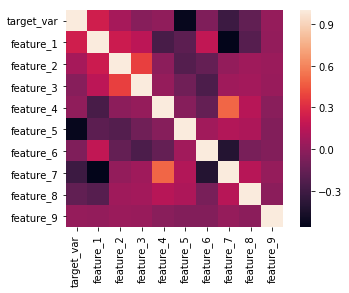

In [41]:
#establishing the correlation between variables
cor = dfA.corr() 
#printing the correlation in a heat map
sns.heatmap(cor, square = True) 
plt.show();

In [17]:
#exploring the data
pd.crosstab(index=dfA["feature_7"], columns="count")

col_0,count
feature_7,
1,323
2,277
3,709


In [18]:
# Cross tabulation of feature 5 against feature 8
feature_5_8 = pd.crosstab(index=dfA["feature_5"], columns=dfA["feature_8"], margins=True)
feature_5_8.columns = ["gamma","qoph","sigma", "row_total"]
feature_5_8.index= ["blue","pink", "col_total"]
feature_5_8

,gamma,qoph,sigma,row_total
blue,113,60,291,464
pink,157,63,623,843
col_total,270,123,914,1307


showing relationship of feature 5 and 8

In [19]:
#To get the total proportion of counts in each cell, divide the table by the grand total:
feature_5_8.div(feature_5_8["row_total"], axis=0)

,gamma,qoph,sigma,row_total
blue,0.243534,0.129310,0.627155,1.0
pink,0.186240,0.074733,0.739027,1.0
col_total,0.206580,0.094109,0.699311,1.0


In [20]:
#crosstabulate to get proportion of feature 8
print(round(pd.crosstab(index=dfA["feature_8"], columns="Percentage", normalize=True)*100))

col_0      Percentage
feature_8            
135.5            21.0
332.0             9.0
850.5            70.0


crosstabulate to get proportion of feature 8 as a percentage

In [21]:
pd.pivot_table(dfA, index= 'feature_8', values= "feature_9")

,feature_9
feature_8,
135.5,103.173518
332.0,101.657112
850.5,101.329427


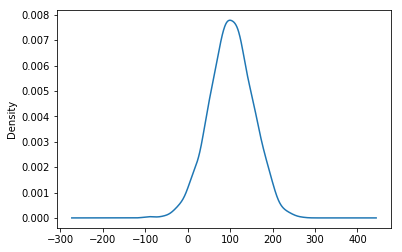

In [21]:
#density plot for a continous variable
dfA["feature_9"].plot(kind="density") 
plt.show();

Density plot for feature 9 defining the skewness

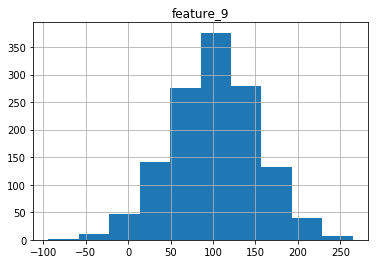

In [22]:
dfA.hist(column="feature_9") 
plt.show();

Histogram showing feature 9 distribution

In [25]:
#skewedness of the data
dfA.skew()


target_var    0.486404
feature_1     4.367709
feature_2     3.669078
feature_3     3.844220
feature_4    -0.000117
feature_5    -0.602189
feature_6     0.407672
feature_7    -0.598647
feature_8    -0.950878
feature_9    -0.100129
dtype: float64

Return unbiased skew over requested axis Normalized by N-1Showing series of feature skewness

In [25]:
dfA.kurt()

target_var    -1.766112
feature_1     27.027986
feature_2     21.541079
feature_3     20.043251
feature_4     -1.200327
feature_5     -1.639876
feature_6      0.146950
feature_7     -1.315079
feature_8     -1.005400
feature_9      0.127507
dtype: float64

Return unbiased kurtosis over requested axis using Fisher’s definition of kurtosis (kurtosis of normal == 0.0). Normalized by N-1

In [43]:
dfA = dfA.replace(np.nan, 0)

Replacing missing values with zeros

In [44]:
X = dfA.drop('target_var', axis=1)  
y = dfA['target_var'] 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)  

Training dataset for prediction

In [46]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Defining the algorithm Support Vector Machine for classification of our model

In [47]:
y_pred = svclassifier.predict(X_test)

Defining prediction parameters for our model

In [48]:
print(confusion_matrix(y_test,y_pred))  

[[245  38]
 [ 52 124]]


A confusion matrix table describing the performance of a classification model (or "classifier") on a set of test data for which the true values are known. It has True positives,False positives,True negatives and False negative meaning:
true positives (TP): These are cases in which we predicted yes .
true negatives (TN): We predicted no
false positives (FP): We predicted yes,  (Also known as a "Type I error.")
false negatives (FN): We predicted no,  (Also known as a "Type II error.")

In [49]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.87      0.84       283
          1       0.77      0.70      0.73       176

avg / total       0.80      0.80      0.80       459



This is the perfomance evaluation of our model which has an avarage of 80% meaning our model is good.It can even be better if we had more data.

We need to train our model better with more data and minimal overfitting we can achieve a better model.
